### ATR : Average True Range
To calculate the Average True Range (ATR) we need a formula, which is given on investoperia.org.
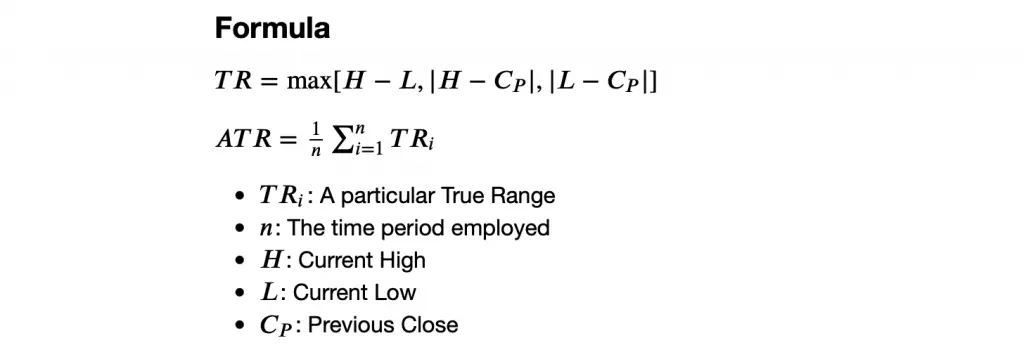

The formula of Average True Range (ATR)
The Average True Range (ATR) is a moving average of the True Range (TR). And the TR is given by the maximum of the current high (H) minus current low (L), the absolute value of current high (H) minus previous close (Cp), and the absolute value of current low (L) and previous close (Cp).

In [1]:
import numpy as np
import pandas_datareader as pdr
import datetime as dt
import pandas as pd

start = dt.datetime(2020, 1, 1)
data = pdr.get_data_yahoo("TSLA", start)

In [2]:
high_low = data['High'] - data['Low']
high_cp = np.abs(data['High'] - data['Close'].shift())
low_cp = np.abs(data['Low'] - data['Close'].shift())

In [3]:
df = pd.concat([high_low, high_cp, low_cp], axis=1)
true_range = np.max(df, axis=1)

In [4]:
average_true_range = true_range.rolling(14).mean()

<IPython.core.display.Javascript object>


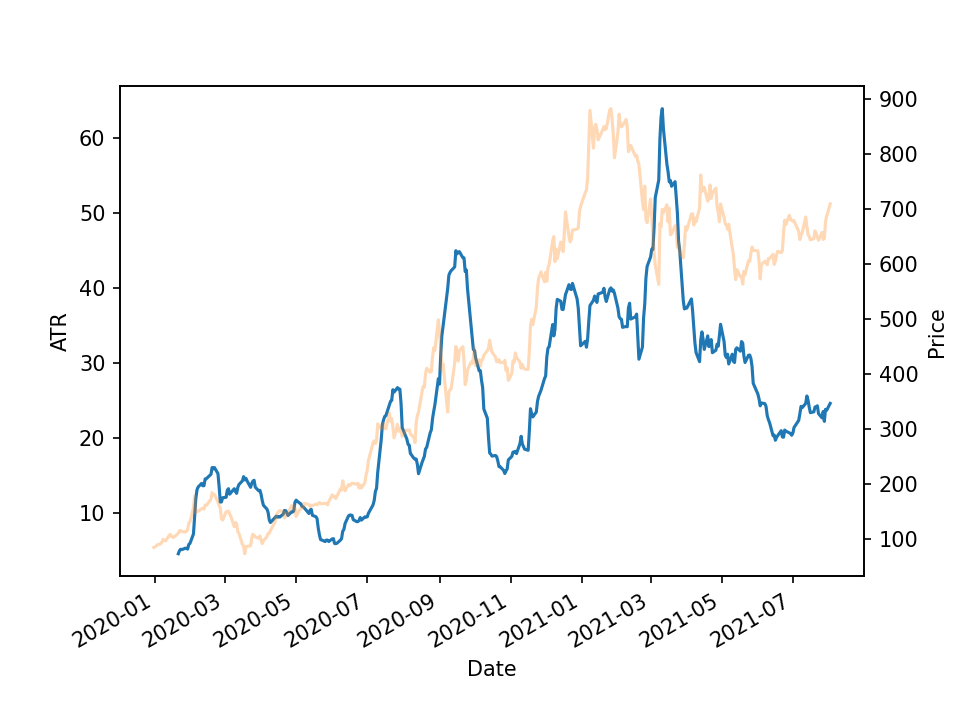

Text(0, 0.5, 'Price')

In [5]:
import matplotlib.pyplot as plt
%matplotlib notebook

fig, ax = plt.subplots()
average_true_range.plot(ax=ax)
ax2 = data['Close'].plot(ax=ax, secondary_y=True, alpha=.3)
ax.set_ylabel("ATR")
ax2.set_ylabel("Price")